In [1]:
import sys
print(sys.version)

3.10.0 (default, Sep 30 2022, 10:42:13) [GCC 9.4.0]


In [31]:
import os
import os.path as osp
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
mpl.rcParams["figure.figsize"] = [9.0, 9.0]
BASEDIR = osp.join("..", "logs")

In [96]:
experiment_choices = ["time", "proportions", "scale", "netwidth"]
plot_configs = {
    "time": {
        "suffix": "_t",
        "legend": ["t = [-0.10, 0.25]", "t = [-0.10, 0.50]", "t = [-0.10, 1.00]",
                    "t = [-0.25, 0.25]", "t = [-0.25, 0.50]", "t = [-0.25, 1.00]",
                    "t = [0.00, 0.25]", "t = [0.00, 0.50]", "t = [0.00, 1.00]"],
        "ylim": (-0.01, 0.5)
    },
    "proportions": {
        "suffix": "_p",
        "legend": ["p = [0.1, 0.1, 0.8]", "p = [0.25, 0.25, 0.5]", "p = [0.4, 0.4, 0.2]"],
        "ylim": (-0.01, 0.5)
    },
    "scale": {
        "suffix": "_s",
        "legend": ["s = 0.001", "s = 0.002", "s = 0.003", "s = 0.004", "s = 0.005", "s = 0.01", "s = 0.1"],
        "ylim": (-0.01, 3)
    },
    "netwidth": {
        "suffix": "_n",
        "legend": ["n = 128", "n = 144", "n = 160", "n = 176", "n = 192", "n = 208", "n = 224", "n = 240", "n = 256"],
        "ylim": (-0.01, 0.5),
    },
}
pltcfg = "netwidth"

In [97]:
sdf_constraint_i3d_df = {}
mc_constraint_i3d_df = {}
sdf_constraint_sitz_df = {}
mc_constraint_sitz_df = {}
for d in sorted(os.listdir(BASEDIR)):
    dir = osp.join(BASEDIR, d)
    losspath = osp.join(dir, "loss.csv")
    if osp.isdir(dir) and osp.exists(losspath):
        df = pd.read_csv(losspath, sep=';', index_col=False)
        if "i3dinit" + plot_configs[pltcfg]["suffix"] in d:
            sdf_constraint_i3d_df[d] = df.sdf_constraint
            mc_constraint_i3d_df[d] = df.mean_curvature_constraint
        elif f"sitz_init" + plot_configs[pltcfg]["suffix"] in d:
            sdf_constraint_sitz_df[d] = df.sdf_constraint
            mc_constraint_sitz_df[d] = df.mean_curvature_constraint

sdf_constraint_i3d_df = pd.DataFrame.from_dict(sdf_constraint_i3d_df)
sdf_constraint_sitz_df = pd.DataFrame.from_dict(sdf_constraint_sitz_df)
mc_constraint_i3d_df = pd.DataFrame.from_dict(mc_constraint_i3d_df)
mc_constraint_sitz_df = pd.DataFrame.from_dict(mc_constraint_sitz_df)

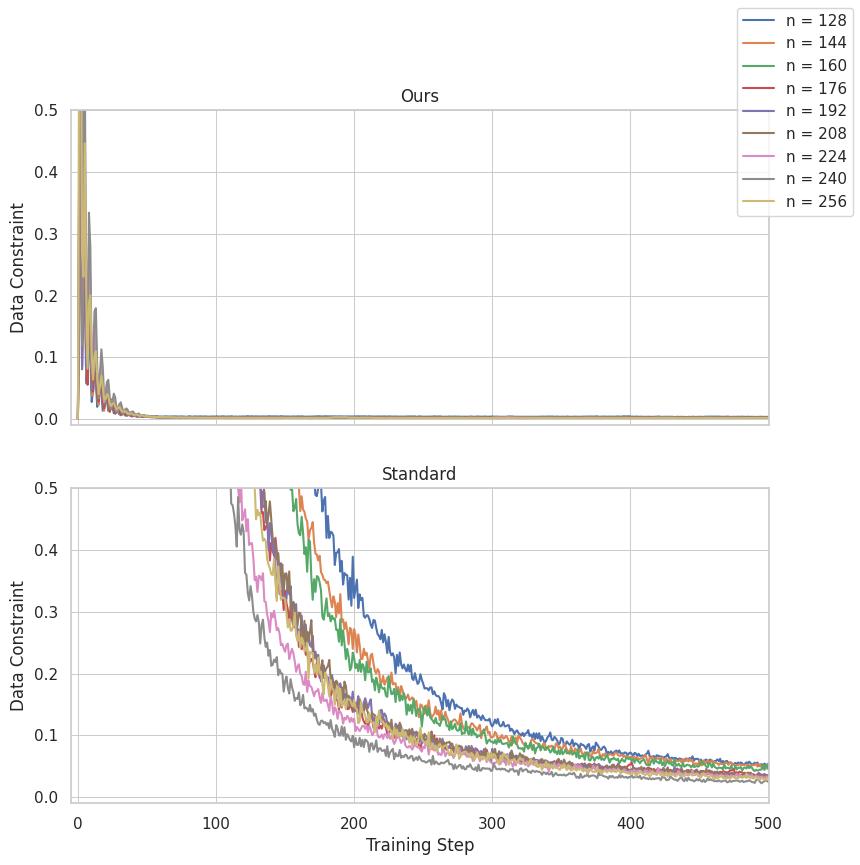

In [100]:
fig, [axl, axr] = plt.subplots(2, 1, sharex=True, sharey=True)
arts = axl.plot(list(range(sdf_constraint_i3d_df.shape[0])), sdf_constraint_i3d_df.values)
axl.set_title("Ours")
axl.set_ylabel("Data Constraint")
axl.set_xlabel("Training Step")

sdf_constraint_sitz_df.plot(legend=False, title="Standard", xlabel="Training Step", ylabel="Data Constraint",
                            ax=axr, ylim=plot_configs[pltcfg]["ylim"], xlim=(-5, 500))

fig.legend(arts, plot_configs[pltcfg]["legend"])
fig.savefig(f"data_{pltcfg}.pdf")

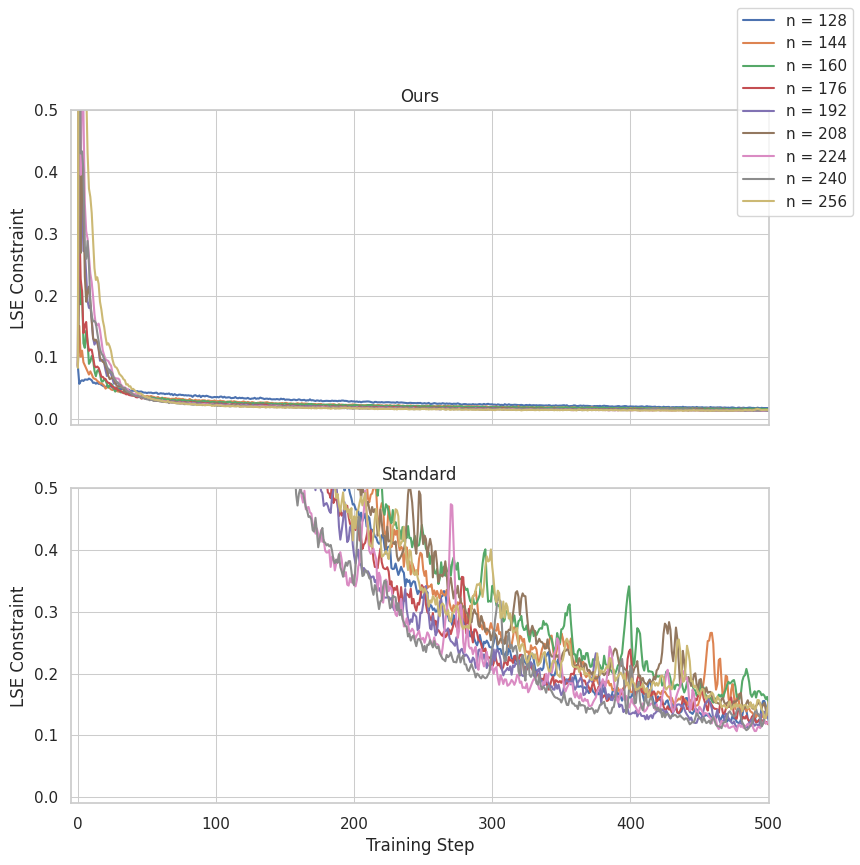

In [101]:
fig, [axl, axr] = plt.subplots(2, 1, sharex=True, sharey=True)
arts = axl.plot(list(range(mc_constraint_i3d_df.shape[0])), mc_constraint_i3d_df.values)
axl.set_title("Ours")
axl.set_ylabel("LSE Constraint")
axl.set_xlabel("Training Step")

mc_constraint_sitz_df.plot(legend=False, title="Standard", ylabel="LSE Constraint", xlabel="Training Step",
                           ax=axr, ylim=plot_configs[pltcfg]["ylim"], xlim=(-5, 500))

fig.legend(arts, plot_configs[pltcfg]["legend"])
fig.savefig(f"lse_{pltcfg}.pdf")